Yellow/Grin Technical Challenge Data Team
===========

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psycopg2
import seaborn as sns

### Connecting to Grin Challenge Database


In [9]:
def get_from_sql(query):
    conn = psycopg2.connect(user='grin_technical_challenge',
                               host='grin-technical-test.crf3v8rvj0hp.us-east-1.rds.amazonaws.com',
                               database='postgres',
                               port='5432',
                               password='kjbaskc24bkjhb354bbjk')
    df = pd.read_sql(query, conn)
    return df

### Retrieving rides data and joining with open app events to get calculate the Time-to-Ride.

***Time-to-Ride***: The difference between the starting time of the ride and the starting time of the session on the app


In [10]:
query = '''
select rd.id as ride_id
     , rd.start_time
     , rd.finish_time
     , rd.starting_lng
     , rd.starting_lat
     , rd.dest_lng
     , rd.dest_lat
     , rd.price
     , rd.scooter_id
     , oa.open_time
     , oa.id as open_app_id
from public.rides rd
left join public.open_app oa
on rd.open_app_id = oa.id
'''


df = get_from_sql(query)

#### Calculating Time-to-Ride column in seconds

In [18]:
df['time_to_ride'] = (df['start_time'] - df['open_time']).dt.total_seconds()

Visual Exploration of Time-to-Ride data

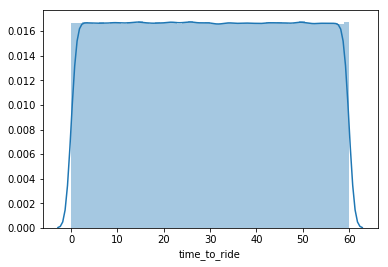

In [21]:
sns.distplot(df['time_to_ride'], hist=True, kde=True)

#### Calculating ride duration in seconds

In [19]:
df['ride_duration'] = (df['finish_time'] - df['start_time']).dt.total_seconds()

Visual Exploration of Ride Duration data

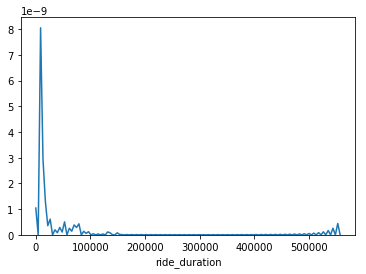

In [25]:
sns.distplot(df['ride_duration'], hist=False, kde=True)

**Dismissal Explanation** 

The initial idea for this challenge was to create a model able to predict the Time-to-Ride data, but this was quickly dismissed because the data provided for this column seems to be all random between 0 and 60 seconds.

The idea behind predicting time-to-ride data was to create an early-stage model for dynamic pricing. The time an user has to wait or walk to get a scooter may indicate a balance between offer and demand. And that relationship could be used to increase/decrease price in primetime (high demand) hours.